<a href="https://colab.research.google.com/github/TheRajaramPande/Reading_Between_the_lines/blob/main/SMDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pmaw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 8.0 MB/s eta 0:00:00


In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
# Used for retrieving data from the Pushshift API, particularly from Reddit
import pmaw
# Used for data manipulation and analysis, particularly for working with tabular data
import pandas as pd
# Provides classes for working with dates and times in Python
from datetime import datetime
# To mount and access Google Drive in a Colab notebook
#from google.colab import drive
import pandas as pd

In [ ]:
from pprint import pprint
from itertools import chain


# sentiment analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, RegexpTokenizer # tokenize words
from nltk.corpus import stopwords
nltk.download('vader_lexicon')

from datetime import timedelta

import csv


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn import svm
import numpy as np
import pandas as pd


from numpy import loadtxt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


How to connect to API

1.You need to generate a client ID and a client secret in order to harvest comments. Go to reddit.com, sign in or create an account, and click on the "apps" tab. You can choose the option that says, "Script for personal use. Will only have access to the developers accounts". Fill in the various fields as instructed. You will need to have a redirect URL, but this could be anything including https://www.reddit.com

2.Once you setup your "app" you will get a screen that shows your client ID and client secret. Paste those into the appropriate slots below. You can name your user agent anything you want and you don't need to fill in the username or password if you are only going to read comments.





In [ ]:
### API

In [ ]:
# Retrieves subreddit posts within a time range and filters specified fields
# Returns the posts in a pandas DataFrame format
# subreddit: the name of the subreddit to retrieve posts from
# start_time: the start of the time range to retrieve data from
# end_time: the end of the time range to retrieve data from
# filters: a list of fields to retrieve for each post (defaulting to a set of commonly-used fields)
# limit: the maximum number of posts to retrieve, defaults to 1000

def retrieve_posts(subreddit, start_time, end_time, filters, limit=1000):

    # If no filters are specified, use a default set of filtersc
    if(len(filters) == 0):
        filters = ['id', 'author', 'created_utc', 'domain', 'url', 'title', 'num_comments', 'score', 'upvote_ratio']

    # Create PushshiftAPI instance and assign to 'api' variable
    api = pmaw.PushshiftAPI()

    # Call search_submissions function to retrieve subreddit posts within specified time range, filtered by fields and limit
    posts = list(api.search_submissions(subreddit=subreddit, after=start_time, before=end_time, filter=filters, limit=limit))

    # Convert the list of posts to a pandas DataFrame
    df = pd.DataFrame(posts)

    # Export the DataFrame to a tab-separated file with UTF-8 encoding
    #df.to_csv('posts', sep='\t', encoding='utf-8')

    with open('ethereum'+str(start_time)+'.csv', mode='a', encoding="utf-8", newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['ID', 'Author', 'Created UTC', 'Domain', 'URL', 'Title', 'Num Comments', 'Score', 'Upvote Ratio'])

        # iterate over the submissions and write the data to the file
        for submission in posts:
            print(submission)
            writer.writerow([submission['author'], submission['created_utc'], submission['domain'], submission['url'], submission['title'], submission['num_comments'], submission['score'], submission['upvote_ratio']])

    # Return the dataframe
    return df

In [ ]:
# Specify null to use default set of filters
filters=[]



# Prompt the user for the start and end dates
#after = input("Enter the start date in this format yyyy-mm-dd: ")
#after = int(datetime.strptime(after, "%Y-%m-%d").timestamp())
#before = input("Enter the end date in this format yyyy-mm-dd: ")
#before = int(datetime.strptime(before, "%Y-%m-%d").timestamp())
start_date = datetime(2021, 1, 1)
end_date = datetime(2021, 12, 31)

# Prompt the user for the subreddit
subreddit='Ethereum'
#subreddit = input("Enter the subreddit: ")

# Retrieve the posts from the specified subreddit within the specified time range
#df_posts = retrieve_posts(subreddit, after, before, filters)

for i in range(366):
    current_date = start_date + timedelta(days=i)
    after = int(current_date.timestamp())
    before = int((current_date + timedelta(days=i)).timestamp())
    df_posts = retrieve_posts(subreddit, after, before, filters)

In [ ]:
# df_posts.to_csv("posts.csv")

In [ ]:
df_posts = pd.read_csv("final_data.csv", encoding='utf-8')

FileNotFoundError: ignored

In [ ]:
df_posts.head(5)

Author  Created UTC         Domain  \
0      [deleted]   1609646497  self.ethereum   
1   NotReal1234_   1609643819  self.ethereum   
2    Seanymac622   1609642400  self.ethereum   
3    SmashBerlin   1609640043  self.ethereum   
4  jamesakillroy   1609637255  self.ethereum   

                                                 URL  \
0  https://www.reddit.com/r/ethereum/comments/kpd...   
1  https://www.reddit.com/r/ethereum/comments/kpc...   
2  https://www.reddit.com/r/ethereum/comments/kpc...   
3  https://www.reddit.com/r/ethereum/comments/kpb...   
4  https://www.reddit.com/r/ethereum/comments/kpa...   

                                         Title  Num Comments  Score  \
0   Buying $14k worth of ETH tomorrow. Advice.            14      6   
1              What exchanges for ETH options?             0      1   
2                                   Trezor one             0      1   
3  Earn easy eth while watching tv or whatever             0      1   
4                  Just bought $20,000 of ETH.           265    367   

   Upvote Ratio             datetime        date  
0          0.80  2021-01-03 04:01:37  2021-01-03  
1          1.00  2021-01-03 03:16:59  2021-01-03  
2          1.00  2021-01-03 02:53:20  2021-01-03  
3          0.66  2021-01-03 02:14:03  2021-01-03  
4          0.92  2021-01-03 01:27:35  2021-01-03

In [ ]:
df_posts.columns

Index(['Author', 'Created UTC', 'Domain', 'URL', 'Title', 'Num Comments',
       'Score', 'Upvote Ratio', 'datetime', 'date'],
      dtype='object')

In [ ]:
if "Unnamed: 0" in df_posts.columns:
  df_posts.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
import csv
import os

directory = r'/content/drive'
output_file = 'combined.csv'

# Open output file for writing
with open(output_file, 'w', newline='', encoding='utf-8') as f_out:
    writer = csv.writer(f_out)

    # Loop through all files in directory
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            file = os.path.join(directory, filename)

            # Open input file for reading
            with open(file, 'r', newline='', encoding='utf-8') as f_in:
                reader = csv.reader(f_in)
                next(reader)  # Skip first row
                for row in reader:
                    writer.writerow(row)


In [ ]:
### API

In [ ]:
### upload kaggle.json file
### to get kaggle.json file go to your kaggle account generate token and then a file automatically gets downloaded
### run the below code to upload the api key file

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"avannigudimetla","key":"ca6454b7985d9e519773b025979eea0b"}'}

In [ ]:
### it makes directory and uploads the kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
!kaggle datasets download -d tencars/392-crypto-currency-pairs-at-minute-resolution

100% 1.77G/1.77G [01:27<00:00, 23.4MB/s]
100% 1.77G/1.77G [01:27<00:00, 21.8MB/s]


In [ ]:
# Unzip the dataset
!unzip 392-crypto-currency-pairs-at-minute-resolution.zip

Archive:  392-crypto-currency-pairs-at-minute-resolution.zip
  inflating: 1inch-usd.csv           
  inflating: 1inch-ust.csv           
  inflating: aaabbb.csv              
  inflating: aave-usd.csv            
  inflating: aave-ust.csv            
  inflating: adabtc.csv              
  inflating: adaf0-ustf0.csv         
  inflating: adausd.csv              
  inflating: adaust.csv              
  inflating: aixusd.csv              
  inflating: aixust.csv              
  inflating: albt-usd.csv            
  inflating: albt-ust.csv            
  inflating: algbtc.csv              
  inflating: algusd.csv              
  inflating: algust.csv              
  inflating: ampbtc.csv              
  inflating: ampf0-ustf0.csv         
  inflating: ampusd.csv              
  inflating: ampust.csv              
  inflating: ancusd.csv              
  inflating: ancust.csv              
  inflating: antbtc.csv              
  inflating: anteth.csv              
  inflating: antusd.csv    

In [ ]:
### read the csv file
df = pd.read_csv('ethusd.csv')

In [ ]:
df.head(5)

time    open   close    high     low  volume
0  1457539440000  10.297  10.097  10.297  10.097    0.03
1  1457545740000  11.197  11.197  11.197  11.197    0.01
2  1457549760000  11.097  11.097  11.097  11.097    0.02
3  1457554560000  11.195  11.195  11.195  11.195    0.01
4  1457554860000  10.870  10.870  10.870  10.870    1.00

In [ ]:
if "Unnamed: 0" in df.columns:
  df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.loc[:, 'time'] = df['time'].apply(lambda x: datetime.fromtimestamp(x/1000.0).strftime('%Y-%m-%d %H:%M:%S'))
df['time'] = pd.to_datetime(df['time'])

In [ ]:
df['Dates'] = pd.to_datetime(df['time']).dt.date
df['Time'] = pd.to_datetime(df['time']).dt.time

In [ ]:
df.head(5)

time    open   close    high     low  volume       Dates  \
0 2016-03-09 16:04:00  10.297  10.097  10.297  10.097    0.03  2016-03-09   
1 2016-03-09 17:49:00  11.197  11.197  11.197  11.197    0.01  2016-03-09   
2 2016-03-09 18:56:00  11.097  11.097  11.097  11.097    0.02  2016-03-09   
3 2016-03-09 20:16:00  11.195  11.195  11.195  11.195    0.01  2016-03-09   
4 2016-03-09 20:21:00  10.870  10.870  10.870  10.870    1.00  2016-03-09   

       Time  
0  16:04:00  
1  17:49:00  
2  18:56:00  
3  20:16:00  
4  20:21:00

In [ ]:
df_posts.head(5)

Author  Created UTC         Domain  \
0      [deleted]   1609646497  self.ethereum   
1   NotReal1234_   1609643819  self.ethereum   
2    Seanymac622   1609642400  self.ethereum   
3    SmashBerlin   1609640043  self.ethereum   
4  jamesakillroy   1609637255  self.ethereum   

                                                 URL  \
0  https://www.reddit.com/r/ethereum/comments/kpd...   
1  https://www.reddit.com/r/ethereum/comments/kpc...   
2  https://www.reddit.com/r/ethereum/comments/kpc...   
3  https://www.reddit.com/r/ethereum/comments/kpb...   
4  https://www.reddit.com/r/ethereum/comments/kpa...   

                                         Title  Num Comments  Score  \
0   Buying $14k worth of ETH tomorrow. Advice.            14      6   
1              What exchanges for ETH options?             0      1   
2                                   Trezor one             0      1   
3  Earn easy eth while watching tv or whatever             0      1   
4                  Just bought $20,000 of ETH.           265    367   

   Upvote Ratio             datetime        date  
0          0.80  2021-01-03 04:01:37  2021-01-03  
1          1.00  2021-01-03 03:16:59  2021-01-03  
2          1.00  2021-01-03 02:53:20  2021-01-03  
3          0.66  2021-01-03 02:14:03  2021-01-03  
4          0.92  2021-01-03 01:27:35  2021-01-03

In [ ]:
df_posts.columns

Index(['Author', 'Created UTC', 'Domain', 'URL', 'Title', 'Num Comments',
       'Score', 'Upvote Ratio', 'datetime', 'date'],
      dtype='object')

In [ ]:
df_posts['Created UTC'] = df_posts['Created UTC'].apply(lambda x: datetime.fromtimestamp(x))

In [ ]:
df_posts['Dates'] = pd.to_datetime(df_posts['Created UTC']).dt.date
df_posts['Time'] = pd.to_datetime(df_posts['Created UTC']).dt.time

In [ ]:
df_posts['Time'] = pd.to_datetime(df_posts['Created UTC']).dt.floor('min').dt.time

In [ ]:

df_posts.head(5)

Author         Created UTC         Domain  \
0      [deleted] 2021-01-03 04:01:37  self.ethereum   
1   NotReal1234_ 2021-01-03 03:16:59  self.ethereum   
2    Seanymac622 2021-01-03 02:53:20  self.ethereum   
3    SmashBerlin 2021-01-03 02:14:03  self.ethereum   
4  jamesakillroy 2021-01-03 01:27:35  self.ethereum   

                                                 URL  \
0  https://www.reddit.com/r/ethereum/comments/kpd...   
1  https://www.reddit.com/r/ethereum/comments/kpc...   
2  https://www.reddit.com/r/ethereum/comments/kpc...   
3  https://www.reddit.com/r/ethereum/comments/kpb...   
4  https://www.reddit.com/r/ethereum/comments/kpa...   

                                         Title  Num Comments  Score  \
0   Buying $14k worth of ETH tomorrow. Advice.            14      6   
1              What exchanges for ETH options?             0      1   
2                                   Trezor one             0      1   
3  Earn easy eth while watching tv or whatever             0      1   
4                  Just bought $20,000 of ETH.           265    367   

   Upvote Ratio             datetime        date       Dates      Time  
0          0.80  2021-01-03 04:01:37  2021-01-03  2021-01-03  04:01:00  
1          1.00  2021-01-03 03:16:59  2021-01-03  2021-01-03  03:16:00  
2          1.00  2021-01-03 02:53:20  2021-01-03  2021-01-03  02:53:00  
3          0.66  2021-01-03 02:14:03  2021-01-03  2021-01-03  02:14:00  
4          0.92  2021-01-03 01:27:35  2021-01-03  2021-01-03  01:27:00

In [ ]:
df_join = pd.merge(df,df_posts,on=['Dates', 'Time'])
df_join.head(5)

time        open   close    high         low     volume  \
0 2021-01-02 05:00:00  730.020000  729.75  730.03  729.750000  37.301972   
1 2021-01-02 05:37:00  732.160000  732.16  732.16  732.160000   0.050000   
2 2021-01-02 06:03:00  731.670000  731.57  731.67  731.240000   0.961383   
3 2021-01-02 06:25:00  732.030000  732.02  732.03  732.020000   0.100000   
4 2021-01-02 06:26:00  731.861389  731.95  731.95  731.861389   0.116660   

        Dates      Time            Author         Created UTC         Domain  \
0  2021-01-02  05:00:00  FrequentMushroom 2021-01-02 05:00:54  self.ethereum   
1  2021-01-02  05:37:00  emperor-penguin- 2021-01-02 05:37:03  self.ethereum   
2  2021-01-02  06:03:00          k_dhokla 2021-01-02 06:03:26  self.ethereum   
3  2021-01-02  06:25:00           dak9000 2021-01-02 06:25:20  self.ethereum   
4  2021-01-02  06:26:00     another_lease 2021-01-02 06:26:09  self.ethereum   

                                                 URL  \
0  https://www.reddit.com/r/ethereum/comments/kor...   
1  https://www.reddit.com/r/ethereum/comments/kor...   
2  https://www.reddit.com/r/ethereum/comments/kos...   
3  https://www.reddit.com/r/ethereum/comments/kos...   
4  https://www.reddit.com/r/ethereum/comments/kos...   

                                              Title  Num Comments  Score  \
0  If Ethereum continues to rise dont GAS fees too?             6      0   
1        Any successful guides for Ethereum mining?             3      0   
2  5 Rinkeby Test Ether (For Learning Purpose Only)             0      1   
3   How does ERC-20 token adoption impact Ethereum?             2      1   
4   Smart Contract to sell a domain name via escrow             1      5   

   Upvote Ratio             datetime        date  
0          0.33  2021-01-02 05:00:54  2021-01-02  
1          0.44  2021-01-02 05:37:03  2021-01-02  
2          1.00  2021-01-02 06:03:26  2021-01-02  
3          1.00  2021-01-02 06:25:20  2021-01-02  
4          0.86  2021-01-02 06:26:09  2021-01-02

In [ ]:
df_posts.head(5)

Author         Created UTC         Domain  \
0      [deleted] 2021-01-03 04:01:37  self.ethereum   
1   NotReal1234_ 2021-01-03 03:16:59  self.ethereum   
2    Seanymac622 2021-01-03 02:53:20  self.ethereum   
3    SmashBerlin 2021-01-03 02:14:03  self.ethereum   
4  jamesakillroy 2021-01-03 01:27:35  self.ethereum   

                                                 URL  \
0  https://www.reddit.com/r/ethereum/comments/kpd...   
1  https://www.reddit.com/r/ethereum/comments/kpc...   
2  https://www.reddit.com/r/ethereum/comments/kpc...   
3  https://www.reddit.com/r/ethereum/comments/kpb...   
4  https://www.reddit.com/r/ethereum/comments/kpa...   

                                         Title  Num Comments  Score  \
0   Buying $14k worth of ETH tomorrow. Advice.            14      6   
1              What exchanges for ETH options?             0      1   
2                                   Trezor one             0      1   
3  Earn easy eth while watching tv or whatever             0      1   
4                  Just bought $20,000 of ETH.           265    367   

   Upvote Ratio             datetime        date       Dates      Time  
0          0.80  2021-01-03 04:01:37  2021-01-03  2021-01-03  04:01:00  
1          1.00  2021-01-03 03:16:59  2021-01-03  2021-01-03  03:16:00  
2          1.00  2021-01-03 02:53:20  2021-01-03  2021-01-03  02:53:00  
3          0.66  2021-01-03 02:14:03  2021-01-03  2021-01-03  02:14:00  
4          0.92  2021-01-03 01:27:35  2021-01-03  2021-01-03  01:27:00

In [ ]:
df_posts['Time_5'] = df_posts['Created UTC'] + timedelta(minutes=5)

In [ ]:
df_posts['window_5'] = pd.to_datetime(df_posts['Time_5']).dt.time

In [ ]:
df_posts.head(5)

Author         Created UTC         Domain  \
0      [deleted] 2021-01-03 04:01:37  self.ethereum   
1   NotReal1234_ 2021-01-03 03:16:59  self.ethereum   
2    Seanymac622 2021-01-03 02:53:20  self.ethereum   
3    SmashBerlin 2021-01-03 02:14:03  self.ethereum   
4  jamesakillroy 2021-01-03 01:27:35  self.ethereum   

                                                 URL  \
0  https://www.reddit.com/r/ethereum/comments/kpd...   
1  https://www.reddit.com/r/ethereum/comments/kpc...   
2  https://www.reddit.com/r/ethereum/comments/kpc...   
3  https://www.reddit.com/r/ethereum/comments/kpb...   
4  https://www.reddit.com/r/ethereum/comments/kpa...   

                                         Title  Num Comments  Score  \
0   Buying $14k worth of ETH tomorrow. Advice.            14      6   
1              What exchanges for ETH options?             0      1   
2                                   Trezor one             0      1   
3  Earn easy eth while watching tv or whatever             0      1   
4                  Just bought $20,000 of ETH.           265    367   

   Upvote Ratio             datetime        date       Dates      Time  \
0          0.80  2021-01-03 04:01:37  2021-01-03  2021-01-03  04:01:00   
1          1.00  2021-01-03 03:16:59  2021-01-03  2021-01-03  03:16:00   
2          1.00  2021-01-03 02:53:20  2021-01-03  2021-01-03  02:53:00   
3          0.66  2021-01-03 02:14:03  2021-01-03  2021-01-03  02:14:00   
4          0.92  2021-01-03 01:27:35  2021-01-03  2021-01-03  01:27:00   

               Time_5  window_5  
0 2021-01-03 04:06:37  04:06:37  
1 2021-01-03 03:21:59  03:21:59  
2 2021-01-03 02:58:20  02:58:20  
3 2021-01-03 02:19:03  02:19:03  
4 2021-01-03 01:32:35  01:32:35

In [ ]:
df.head(5)

time    open   close    high     low  volume       Dates  \
0 2016-03-09 16:04:00  10.297  10.097  10.297  10.097    0.03  2016-03-09   
1 2016-03-09 17:49:00  11.197  11.197  11.197  11.197    0.01  2016-03-09   
2 2016-03-09 18:56:00  11.097  11.097  11.097  11.097    0.02  2016-03-09   
3 2016-03-09 20:16:00  11.195  11.195  11.195  11.195    0.01  2016-03-09   
4 2016-03-09 20:21:00  10.870  10.870  10.870  10.870    1.00  2016-03-09   

       Time  
0  16:04:00  
1  17:49:00  
2  18:56:00  
3  20:16:00  
4  20:21:00

In [ ]:
df.rename(columns={'Time': 'window_5'}, inplace=True)

In [ ]:
df_posts['window_5'] = pd.to_datetime(df_posts['Time_5']).dt.floor('min').dt.time

In [ ]:
df_join1 = pd.merge(df,df_posts,on=['Dates', 'window_5'])
df_join1.head(5)

time        open   close    high         low     volume  \
0 2021-01-02 05:05:00  731.800650  731.96  731.96  731.770000   5.098492   
1 2021-01-02 06:08:00  732.472475  732.59  732.59  732.472475   0.617885   
2 2021-01-02 06:30:00  732.310000  732.31  732.31  732.310000   0.100000   
3 2021-01-02 06:31:00  732.730000  732.73  732.73  732.560000   0.416560   
4 2021-01-02 06:52:00  738.130000  738.99  739.71  738.130000  71.664351   

        Dates  window_5            Author         Created UTC  \
0  2021-01-02  05:05:00  FrequentMushroom 2021-01-02 05:00:54   
1  2021-01-02  06:08:00          k_dhokla 2021-01-02 06:03:26   
2  2021-01-02  06:30:00           dak9000 2021-01-02 06:25:20   
3  2021-01-02  06:31:00     another_lease 2021-01-02 06:26:09   
4  2021-01-02  06:52:00        Nerolation 2021-01-02 06:47:32   

                              Domain  \
0                      self.ethereum   
1                      self.ethereum   
2                      self.ethereum   
3                      self.ethereum   
4  connect-four.toniwahrstaetter.com   

                                                 URL  \
0  https://www.reddit.com/r/ethereum/comments/kor...   
1  https://www.reddit.com/r/ethereum/comments/kos...   
2  https://www.reddit.com/r/ethereum/comments/kos...   
3  https://www.reddit.com/r/ethereum/comments/kos...   
4          http://connect-four.toniwahrstaetter.com/   

                                               Title  Num Comments  Score  \
0   If Ethereum continues to rise dont GAS fees too?             6      0   
1   5 Rinkeby Test Ether (For Learning Purpose Only)             0      1   
2    How does ERC-20 token adoption impact Ethereum?             2      1   
3    Smart Contract to sell a domain name via escrow             1      5   
4  I created a simple Ethereum-based Connect Four...             0      7   

   Upvote Ratio             datetime        date      Time              Time_5  
0          0.33  2021-01-02 05:00:54  2021-01-02  05:00:00 2021-01-02 05:05:54  
1          1.00  2021-01-02 06:03:26  2021-01-02  06:03:00 2021-01-02 06:08:26  
2          1.00  2021-01-02 06:25:20  2021-01-02  06:25:00 2021-01-02 06:30:20  
3          0.86  2021-01-02 06:26:09  2021-01-02  06:26:00 2021-01-02 06:31:09  
4          1.00  2021-01-02 06:47:32  2021-01-02  06:47:00 2021-01-02 06:52:32

In [ ]:
df_join1.shape

(357943, 20)

In [ ]:
df_join.drop(['open', 'close','low', 'volume','time'], axis=1, inplace=True)

In [ ]:
df_join.shape

(358148, 13)

In [ ]:
df_join.head(5)

high       Dates      Time            Author         Created UTC  \
0  730.03  2021-01-02  05:00:00  FrequentMushroom 2021-01-02 05:00:54   
1  732.16  2021-01-02  05:37:00  emperor-penguin- 2021-01-02 05:37:03   
2  731.67  2021-01-02  06:03:00          k_dhokla 2021-01-02 06:03:26   
3  732.03  2021-01-02  06:25:00           dak9000 2021-01-02 06:25:20   
4  731.95  2021-01-02  06:26:00     another_lease 2021-01-02 06:26:09   

          Domain                                                URL  \
0  self.ethereum  https://www.reddit.com/r/ethereum/comments/kor...   
1  self.ethereum  https://www.reddit.com/r/ethereum/comments/kor...   
2  self.ethereum  https://www.reddit.com/r/ethereum/comments/kos...   
3  self.ethereum  https://www.reddit.com/r/ethereum/comments/kos...   
4  self.ethereum  https://www.reddit.com/r/ethereum/comments/kos...   

                                              Title  Num Comments  Score  \
0  If Ethereum continues to rise dont GAS fees too?             6      0   
1        Any successful guides for Ethereum mining?             3      0   
2  5 Rinkeby Test Ether (For Learning Purpose Only)             0      1   
3   How does ERC-20 token adoption impact Ethereum?             2      1   
4   Smart Contract to sell a domain name via escrow             1      5   

   Upvote Ratio             datetime        date  price_5  
0          0.33  2021-01-02 05:00:54  2021-01-02   731.96  
1          0.44  2021-01-02 05:37:03  2021-01-02   732.59  
2          1.00  2021-01-02 06:03:26  2021-01-02   732.31  
3          1.00  2021-01-02 06:25:20  2021-01-02   732.73  
4          0.86  2021-01-02 06:26:09  2021-01-02   739.71

In [ ]:
df_join['price_5'] = df_join1['high']

In [ ]:
df_join['Title'] = df_join['Title'].astype('str')

In [ ]:
df_join.to_csv("join_posts_price.csv")

In [ ]:
## Data is fetched from the doc join_posts_price.csv which has merged data
import pandas as pd
df_final_data = pd.read_csv('join_posts_price.csv')
df_final_data.head(5)

Unnamed: 0    high       Dates      Time            Author  \
0           0  730.03  2021-01-02  05:00:00  FrequentMushroom   
1           1  732.16  2021-01-02  05:37:00  emperor-penguin-   
2           2  731.67  2021-01-02  06:03:00          k_dhokla   
3           3  732.03  2021-01-02  06:25:00           dak9000   
4           4  731.95  2021-01-02  06:26:00     another_lease   

           Created UTC         Domain  \
0  2021-01-02 05:00:54  self.ethereum   
1  2021-01-02 05:37:03  self.ethereum   
2  2021-01-02 06:03:26  self.ethereum   
3  2021-01-02 06:25:20  self.ethereum   
4  2021-01-02 06:26:09  self.ethereum   

                                                 URL  \
0  https://www.reddit.com/r/ethereum/comments/kor...   
1  https://www.reddit.com/r/ethereum/comments/kor...   
2  https://www.reddit.com/r/ethereum/comments/kos...   
3  https://www.reddit.com/r/ethereum/comments/kos...   
4  https://www.reddit.com/r/ethereum/comments/kos...   

                                              Title  Num Comments  Score  \
0  If Ethereum continues to rise dont GAS fees too?             6      0   
1        Any successful guides for Ethereum mining?             3      0   
2  5 Rinkeby Test Ether (For Learning Purpose Only)             0      1   
3   How does ERC-20 token adoption impact Ethereum?             2      1   
4   Smart Contract to sell a domain name via escrow             1      5   

   Upvote Ratio             datetime        date  
0          0.33  2021-01-02 05:00:54  2021-01-02  
1          0.44  2021-01-02 05:37:03  2021-01-02  
2          1.00  2021-01-02 06:03:26  2021-01-02  
3          1.00  2021-01-02 06:25:20  2021-01-02  
4          0.86  2021-01-02 06:26:09  2021-01-02

In [ ]:
if "Unnamed: 0" in df_final_data.columns:
  df_final_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df_final_data.shape

(358148, 13)

In [ ]:
## This code imports the Google Colab library and specifically the "drive" module, which is used to mount the Google Drive to the Colab notebook.
## Once mounted, it allows the notebook to access files and folders stored in the user's Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## This code imports the sqlite3 module and creates a connection to a SQLite database file named reddit.db located in Google Drive.
## The connect() method is used to create a connection object to the database, and the file path is specified as an argument.
## The cursor method is called on the connection object to create a cursor object which allows you to interact with the database.
import sqlite3
connection = sqlite3.connect('/content/drive/MyDrive/reddit.db')
cursor = connection.cursor()

In [ ]:
## This code creates a table named "Ethereum" with several columns, including the primary key Id, in the connected database if it does not already exist.
## The changes are committed to the database using connection.commit()

connection.execute('''
    CREATE TABLE IF NOT EXISTS Ethereum (
    Id INTEGER PRIMARY KEY AUTOINCREMENT,
    Title TEXT,
    Price FLOAT,
    Author TEXT,
    Domain TEXT,
    CreatedUTC DATETIME,
    Dates DATE,
    Time TIME,
    NumComments INTEGER,
    Score INTEGER,
    UpvoteRatio FLOAT,
    Url TEXT
);  '''
)
connection.commit()

In [ ]:
# Define the SQL statement to insert records
insert_query = "INSERT INTO Ethereum (Title, Price, Author, Domain, CreatedUTC, Dates, Time, NumComments, Score, UpvoteRatio, Url) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)"
# Insert the data in batches
batch_size = 10000
for i in range(0, len(df_final_data), batch_size):
    batch = df_final_data.iloc[i:i+batch_size]
    data = [(row['Title'], row['high'], row['Author'], row['Domain'], row['Created UTC'], row['Dates'],
             row['Time'], row['Num Comments'], row['Score'], row['Upvote Ratio'], row['URL'])
             for index, row in batch.iterrows()]
    cursor.executemany(insert_query, data)
    connection.commit()

# Close the connection to the database
connection.close()



In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
res = [*df_join['Title'].apply(sia.polarity_scores)]
pprint(res[:3])

[{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.5859, 'neg': 0.0, 'neu': 0.568, 'pos': 0.432},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}]


In [ ]:
sentiment_df = pd.DataFrame.from_records(res)
df_merged = pd.concat([df_join, sentiment_df], axis=1, join='inner')
df_merged.head()

high       Dates      Time            Author         Created UTC  \
0  730.03  2021-01-02  05:00:00  FrequentMushroom 2021-01-02 05:00:54   
1  732.16  2021-01-02  05:37:00  emperor-penguin- 2021-01-02 05:37:03   
2  731.67  2021-01-02  06:03:00          k_dhokla 2021-01-02 06:03:26   
3  732.03  2021-01-02  06:25:00           dak9000 2021-01-02 06:25:20   
4  731.95  2021-01-02  06:26:00     another_lease 2021-01-02 06:26:09   

          Domain                                                URL  \
0  self.ethereum  https://www.reddit.com/r/ethereum/comments/kor...   
1  self.ethereum  https://www.reddit.com/r/ethereum/comments/kor...   
2  self.ethereum  https://www.reddit.com/r/ethereum/comments/kos...   
3  self.ethereum  https://www.reddit.com/r/ethereum/comments/kos...   
4  self.ethereum  https://www.reddit.com/r/ethereum/comments/kos...   

                                              Title  Num Comments  Score  \
0  If Ethereum continues to rise dont GAS fees too?             6      0   
1        Any successful guides for Ethereum mining?             3      0   
2  5 Rinkeby Test Ether (For Learning Purpose Only)             0      1   
3   How does ERC-20 token adoption impact Ethereum?             2      1   
4   Smart Contract to sell a domain name via escrow             1      5   

   Upvote Ratio             datetime        date  price_5  neg    neu    pos  \
0          0.33  2021-01-02 05:00:54  2021-01-02   731.96  0.0  1.000  0.000   
1          0.44  2021-01-02 05:37:03  2021-01-02   732.59  0.0  0.568  0.432   
2          1.00  2021-01-02 06:03:26  2021-01-02   732.31  0.0  1.000  0.000   
3          1.00  2021-01-02 06:25:20  2021-01-02   732.73  0.0  1.000  0.000   
4          0.86  2021-01-02 06:26:09  2021-01-02   739.71  0.0  0.722  0.278   

   compound  
0    0.0000  
1    0.5859  
2    0.0000  
3    0.0000  
4    0.4019

In [ ]:
#### initialising threshold
import numpy as np
THRESHOLD = 0.2

conditions = [
    (df_merged['compound'] <= -THRESHOLD),
    (df_merged['compound'] > -THRESHOLD) & (df_merged['compound'] < THRESHOLD),
    (df_merged['compound'] >= THRESHOLD),
    ]

values = ["neg", "neu", "pos"]
df_merged['label'] = np.select(conditions, values)

df_merged.head()

high       Dates      Time            Author         Created UTC  \
0  730.03  2021-01-02  05:00:00  FrequentMushroom 2021-01-02 05:00:54   
1  732.16  2021-01-02  05:37:00  emperor-penguin- 2021-01-02 05:37:03   
2  731.67  2021-01-02  06:03:00          k_dhokla 2021-01-02 06:03:26   
3  732.03  2021-01-02  06:25:00           dak9000 2021-01-02 06:25:20   
4  731.95  2021-01-02  06:26:00     another_lease 2021-01-02 06:26:09   

          Domain                                                URL  \
0  self.ethereum  https://www.reddit.com/r/ethereum/comments/kor...   
1  self.ethereum  https://www.reddit.com/r/ethereum/comments/kor...   
2  self.ethereum  https://www.reddit.com/r/ethereum/comments/kos...   
3  self.ethereum  https://www.reddit.com/r/ethereum/comments/kos...   
4  self.ethereum  https://www.reddit.com/r/ethereum/comments/kos...   

                                              Title  Num Comments  Score  \
0  If Ethereum continues to rise dont GAS fees too?             6      0   
1        Any successful guides for Ethereum mining?             3      0   
2  5 Rinkeby Test Ether (For Learning Purpose Only)             0      1   
3   How does ERC-20 token adoption impact Ethereum?             2      1   
4   Smart Contract to sell a domain name via escrow             1      5   

   Upvote Ratio             datetime        date  price_5  neg    neu    pos  \
0          0.33  2021-01-02 05:00:54  2021-01-02   731.96  0.0  1.000  0.000   
1          0.44  2021-01-02 05:37:03  2021-01-02   732.59  0.0  0.568  0.432   
2          1.00  2021-01-02 06:03:26  2021-01-02   732.31  0.0  1.000  0.000   
3          1.00  2021-01-02 06:25:20  2021-01-02   732.73  0.0  1.000  0.000   
4          0.86  2021-01-02 06:26:09  2021-01-02   739.71  0.0  0.722  0.278   

   compound label  
0    0.0000   neu  
1    0.5859   pos  
2    0.0000   neu  
3    0.0000   neu  
4    0.4019   pos

In [ ]:
df_merged.to_csv("merged.csv")

In [ ]:
df_merged = pd.read_csv("merged.csv")

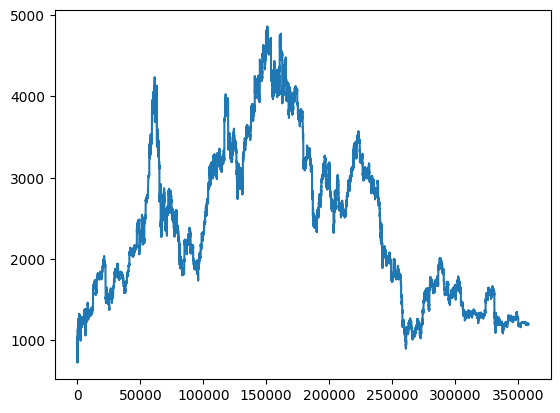

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

df_merged['high'].plot()
plt.show()

In [ ]:
df_merged.head(5)

Unnamed: 0    high       Dates      Time            Author  \
0           0  730.03  2021-01-02  05:00:00  FrequentMushroom   
1           1  732.16  2021-01-02  05:37:00  emperor-penguin-   
2           2  731.67  2021-01-02  06:03:00          k_dhokla   
3           3  732.03  2021-01-02  06:25:00           dak9000   
4           4  731.95  2021-01-02  06:26:00     another_lease   

           Created UTC         Domain  \
0  2021-01-02 05:00:54  self.ethereum   
1  2021-01-02 05:37:03  self.ethereum   
2  2021-01-02 06:03:26  self.ethereum   
3  2021-01-02 06:25:20  self.ethereum   
4  2021-01-02 06:26:09  self.ethereum   

                                                 URL  \
0  https://www.reddit.com/r/ethereum/comments/kor...   
1  https://www.reddit.com/r/ethereum/comments/kor...   
2  https://www.reddit.com/r/ethereum/comments/kos...   
3  https://www.reddit.com/r/ethereum/comments/kos...   
4  https://www.reddit.com/r/ethereum/comments/kos...   

                                              Title  Num Comments  Score  \
0  If Ethereum continues to rise dont GAS fees too?             6      0   
1        Any successful guides for Ethereum mining?             3      0   
2  5 Rinkeby Test Ether (For Learning Purpose Only)             0      1   
3   How does ERC-20 token adoption impact Ethereum?             2      1   
4   Smart Contract to sell a domain name via escrow             1      5   

   Upvote Ratio             datetime        date  price_5  neg    neu    pos  \
0          0.33  2021-01-02 05:00:54  2021-01-02   731.96  0.0  1.000  0.000   
1          0.44  2021-01-02 05:37:03  2021-01-02   732.59  0.0  0.568  0.432   
2          1.00  2021-01-02 06:03:26  2021-01-02   732.31  0.0  1.000  0.000   
3          1.00  2021-01-02 06:25:20  2021-01-02   732.73  0.0  1.000  0.000   
4          0.86  2021-01-02 06:26:09  2021-01-02   739.71  0.0  0.722  0.278   

   compound label  
0    0.0000   neu  
1    0.5859   pos  
2    0.0000   neu  
3    0.0000   neu  
4    0.4019   pos

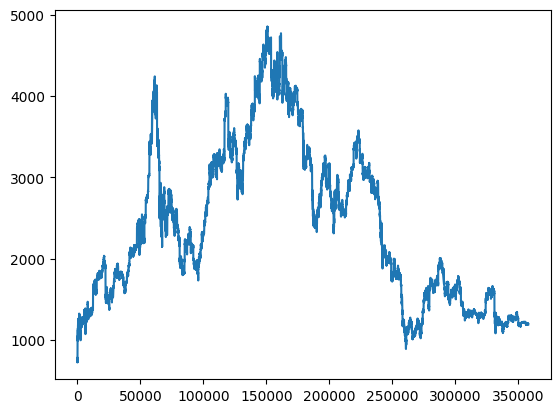

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

df_merged['price_5'].plot()
plt.show()

<ipython-input-140-cf082a4f66ee>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_merged.groupby(['label']).sum().plot(kind='pie', y='high', autopct='%1.0f%%',


<Axes: title={'center': 'Points Scored by Team'}, ylabel='high'>

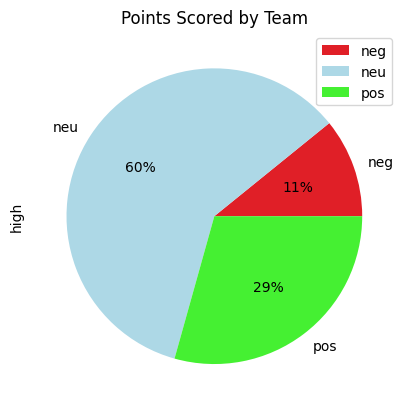

In [ ]:
df_merged.groupby(['label']).sum().plot(kind='pie', y='high', autopct='%1.0f%%',
                                colors = ['#e01f27', 'lightblue', '#45f032'],
                                title='Points Scored by Team')

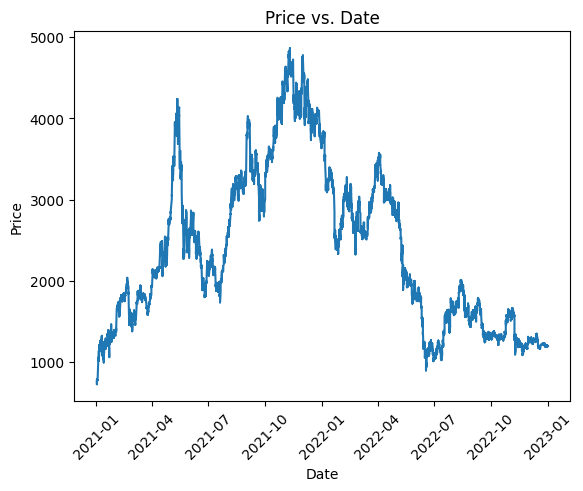

In [ ]:
df_merged['date'] = pd.to_datetime(df_merged['date'])

# Plot the price column against the date column
plt.plot(df_merged['date'], df_merged['high'])

# Set the axis labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price vs. Date')

plt.xticks(rotation=45)
# Show the plot
plt.show()

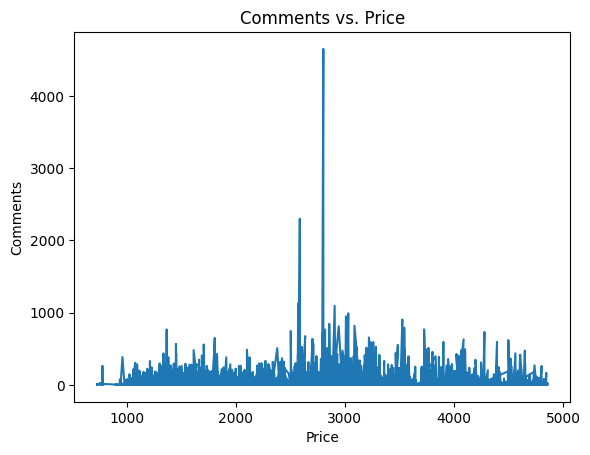

In [ ]:


# Plot the price column against the date column
plt.plot(df_merged['high'],df_merged['Num Comments'])

# Set the axis labels and title
plt.xlabel('Price')
plt.ylabel('Comments')
plt.title('Comments vs. Price')

# plt.xticks(rotation=45)
# Show the plot
plt.show()

In [ ]:
df_merged.columns

Index(['Unnamed: 0', 'high', 'Dates', 'Time', 'Author', 'Created UTC',
       'Domain', 'URL', 'Title', 'Num Comments', 'Score', 'Upvote Ratio',
       'datetime', 'date', 'price_5', 'neg', 'neu', 'pos', 'compound',
       'label'],
      dtype='object')

In [ ]:
# df_merged.drop(['Dates', 'Time', 'Created UTC','date','label','Author','Domain','URL'], axis=1, inplace=True)

In [ ]:
if "Unnamed: 0" in df_merged.columns:
  df_merged.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df_merged.head(5)

high       Dates      Time            Author          Created UTC  \
0  730.03  2021-01-02  05:00:00  FrequentMushroom  2021-01-02 05:00:54   
1  732.16  2021-01-02  05:37:00  emperor-penguin-  2021-01-02 05:37:03   
2  731.67  2021-01-02  06:03:00          k_dhokla  2021-01-02 06:03:26   
3  732.03  2021-01-02  06:25:00           dak9000  2021-01-02 06:25:20   
4  731.95  2021-01-02  06:26:00     another_lease  2021-01-02 06:26:09   

          Domain                                                URL  \
0  self.ethereum  https://www.reddit.com/r/ethereum/comments/kor...   
1  self.ethereum  https://www.reddit.com/r/ethereum/comments/kor...   
2  self.ethereum  https://www.reddit.com/r/ethereum/comments/kos...   
3  self.ethereum  https://www.reddit.com/r/ethereum/comments/kos...   
4  self.ethereum  https://www.reddit.com/r/ethereum/comments/kos...   

                                              Title  Num Comments  Score  \
0  If Ethereum continues to rise dont GAS fees too?           6.0    0.0   
1        Any successful guides for Ethereum mining?           3.0    0.0   
2  5 Rinkeby Test Ether (For Learning Purpose Only)           0.0    1.0   
3   How does ERC-20 token adoption impact Ethereum?           2.0    1.0   
4   Smart Contract to sell a domain name via escrow           1.0    5.0   

   Upvote Ratio             datetime        date  price_5  neg    neu    pos  \
0          0.33  2021-01-02 05:00:54  2021-01-02   731.96  0.0  1.000  0.000   
1          0.44  2021-01-02 05:37:03  2021-01-02   732.59  0.0  0.568  0.432   
2          1.00  2021-01-02 06:03:26  2021-01-02   732.31  0.0  1.000  0.000   
3          1.00  2021-01-02 06:25:20  2021-01-02   732.73  0.0  1.000  0.000   
4          0.86  2021-01-02 06:26:09  2021-01-02   739.71  0.0  0.722  0.278   

   compound label  
0    0.0000   neu  
1    0.5859   pos  
2    0.0000   neu  
3    0.0000   neu  
4    0.4019   pos

In [ ]:
df_merged.dtypes

high            float64
Dates            object
Time             object
Author           object
Created UTC      object
Domain           object
URL              object
Title            object
Num Comments    float64
Score           float64
Upvote Ratio    float64
datetime         object
date             object
price_5         float64
neg             float64
neu             float64
pos             float64
compound        float64
label            object
dtype: object

In [ ]:
# pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 52.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=3af49b525f595d2a75d985827f810b8097a4378519bce1

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df_merged, title="Pandas Profiling Report")
profile

<ipython-input-14-71c838b6bf7a>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df_merged = df_merged.dropna()

In [ ]:
import re
df_merged['Title'] = df_merged['Title'].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', x))

<ipython-input-16-e117f23da870>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['Title'] = df_merged['Title'].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', x))


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

for i in range(len(df_merged)):
    title = df_merged.iloc[i]['Title']
    words = word_tokenize(title.lower())
    words = [w for w in words if not w in stop_words]
    df_merged.at[i, 'Title'] = ' '.join(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_merged["title_count"] = df_merged["Title"].apply(lambda n: len(n.split()))

<ipython-input-18-2604644d4cc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged["title_count"] = df_merged["Title"].apply(lambda n: len(n.split()))


In [ ]:
df_merged.head(5)

high       Dates      Time            Author          Created UTC  \
0  730.03  2021-01-02  05:00:00  FrequentMushroom  2021-01-02 05:00:54   
1  732.16  2021-01-02  05:37:00  emperor-penguin-  2021-01-02 05:37:03   
2  731.67  2021-01-02  06:03:00          k_dhokla  2021-01-02 06:03:26   
3  732.03  2021-01-02  06:25:00           dak9000  2021-01-02 06:25:20   
4  731.95  2021-01-02  06:26:00     another_lease  2021-01-02 06:26:09   

          Domain                                                URL  \
0  self.ethereum  https://www.reddit.com/r/ethereum/comments/kor...   
1  self.ethereum  https://www.reddit.com/r/ethereum/comments/kor...   
2  self.ethereum  https://www.reddit.com/r/ethereum/comments/kos...   
3  self.ethereum  https://www.reddit.com/r/ethereum/comments/kos...   
4  self.ethereum  https://www.reddit.com/r/ethereum/comments/kos...   

                                        Title  Num Comments  Score  \
0       ethereum continues rise dont gas fees           6.0    0.0   
1           successful guides ethereum mining           3.0    0.0   
2       5 rinkeby test ether learning purpose           0.0    1.0   
3        erc20 token adoption impact ethereum           2.0    1.0   
4  smart contract sell domain name via escrow           1.0    5.0   

   Upvote Ratio             datetime        date  price_5  neg    neu    pos  \
0          0.33  2021-01-02 05:00:54  2021-01-02   731.96  0.0  1.000  0.000   
1          0.44  2021-01-02 05:37:03  2021-01-02   732.59  0.0  0.568  0.432   
2          1.00  2021-01-02 06:03:26  2021-01-02   732.31  0.0  1.000  0.000   
3          1.00  2021-01-02 06:25:20  2021-01-02   732.73  0.0  1.000  0.000   
4          0.86  2021-01-02 06:26:09  2021-01-02   739.71  0.0  0.722  0.278   

   compound label  title_count  
0    0.0000   neu            6  
1    0.5859   pos            4  
2    0.0000   neu            6  
3    0.0000   neu            5  
4    0.4019   pos            7

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18573 entries, 0 to 18572
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   high          18573 non-null  float64
 1   Dates         18573 non-null  object 
 2   Time          18573 non-null  object 
 3   Author        18573 non-null  object 
 4   Created UTC   18573 non-null  object 
 5   Domain        18573 non-null  object 
 6   URL           18573 non-null  object 
 7   Title         18573 non-null  object 
 8   Num Comments  18573 non-null  float64
 9   Score         18573 non-null  float64
 10  Upvote Ratio  18573 non-null  float64
 11  datetime      18573 non-null  object 
 12  date          18573 non-null  object 
 13  price_5       18573 non-null  float64
 14  neg           18573 non-null  float64
 15  neu           18573 non-null  float64
 16  pos           18573 non-null  float64
 17  compound      18573 non-null  float64
 18  label         18573 non-nu

In [ ]:
df_merged['datetime'] = pd.to_datetime(df_merged['datetime'])

df_merged['week_day'] = df_merged['datetime'].dt.day_name()

<ipython-input-21-73af1a9f09f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['datetime'] = pd.to_datetime(df_merged['datetime'])
<ipython-input-21-73af1a9f09f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['week_day'] = df_merged['datetime'].dt.day_name()


In [ ]:
df_merged.head(5)

high       Dates      Time            Author          Created UTC  \
0  730.03  2021-01-02  05:00:00  FrequentMushroom  2021-01-02 05:00:54   
1  732.16  2021-01-02  05:37:00  emperor-penguin-  2021-01-02 05:37:03   
2  731.67  2021-01-02  06:03:00          k_dhokla  2021-01-02 06:03:26   
3  732.03  2021-01-02  06:25:00           dak9000  2021-01-02 06:25:20   
4  731.95  2021-01-02  06:26:00     another_lease  2021-01-02 06:26:09   

          Domain                                                URL  \
0  self.ethereum  https://www.reddit.com/r/ethereum/comments/kor...   
1  self.ethereum  https://www.reddit.com/r/ethereum/comments/kor...   
2  self.ethereum  https://www.reddit.com/r/ethereum/comments/kos...   
3  self.ethereum  https://www.reddit.com/r/ethereum/comments/kos...   
4  self.ethereum  https://www.reddit.com/r/ethereum/comments/kos...   

                                        Title  Num Comments  Score  ...  \
0       ethereum continues rise dont gas fees           6.0    0.0  ...   
1           successful guides ethereum mining           3.0    0.0  ...   
2       5 rinkeby test ether learning purpose           0.0    1.0  ...   
3        erc20 token adoption impact ethereum           2.0    1.0  ...   
4  smart contract sell domain name via escrow           1.0    5.0  ...   

             datetime        date price_5  neg    neu    pos  compound  label  \
0 2021-01-02 05:00:54  2021-01-02  731.96  0.0  1.000  0.000    0.0000    neu   
1 2021-01-02 05:37:03  2021-01-02  732.59  0.0  0.568  0.432    0.5859    pos   
2 2021-01-02 06:03:26  2021-01-02  732.31  0.0  1.000  0.000    0.0000    neu   
3 2021-01-02 06:25:20  2021-01-02  732.73  0.0  1.000  0.000    0.0000    neu   
4 2021-01-02 06:26:09  2021-01-02  739.71  0.0  0.722  0.278    0.4019    pos   

  title_count  week_day  
0           6  Saturday  
1           4  Saturday  
2           6  Saturday  
3           5  Saturday  
4           7  Saturday  

[5 rows x 21 columns]

In [ ]:
df_merged['week_day'].unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

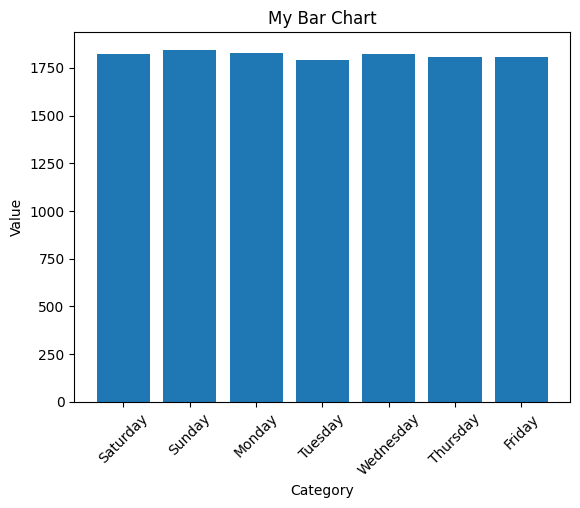

In [ ]:
import matplotlib.pyplot as plt
plt.bar(df_merged['week_day'], df_merged['high'])

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('My Bar Chart')
plt.xticks(rotation=45)

# Show the chart
plt.show()


In [ ]:
stop_words = stopwords.words('english')

In [ ]:
def custom_tokenize(text):
  # remove single quote and dashes
  text = text.replace("'", "").replace("-", "").lower()

  # split on words only
  tk = nltk.tokenize.RegexpTokenizer(r'\w+')
  tokens = tk.tokenize(text)

  # remove stop words
  words = [w for w in tokens if not w in stop_words]
  return words

In [ ]:

def tokens_title(df, label):
  # subset titles based on label
  titles = df[df['label'] == label].Title
  # apply our custom tokenize function to each title
  tokens = titles.apply(custom_tokenize)
  # join nested lists into a single list
  words = list(chain.from_iterable(tokens))
  return words

In [ ]:
pos_words = tokens_title(df_merged, 'pos')
neg_words = tokens_title(df_merged, 'neg')

In [ ]:
pos_freq = nltk.FreqDist(pos_words)
pos_freq.most_common(25)

[('ethereum', 1129),
 ('eth', 849),
 ('help', 549),
 ('crypto', 478),
 ('best', 345),
 ('please', 310),
 ('wallet', 310),
 ('good', 292),
 ('like', 285),
 ('smart', 263),
 ('free', 222),
 ('contract', 195),
 ('im', 187),
 ('defi', 187),
 ('new', 185),
 ('bitcoin', 166),
 ('top', 161),
 ('token', 159),
 ('buy', 152),
 ('get', 143),
 ('would', 137),
 ('price', 131),
 ('time', 129),
 ('first', 128),
 ('need', 126)]

In [ ]:
neg_freq = nltk.FreqDist(neg_words)
neg_freq.most_common(20)


[('ethereum', 526),
 ('eth', 460),
 ('gas', 177),
 ('scam', 139),
 ('crypto', 127),
 ('transaction', 126),
 ('help', 98),
 ('fees', 95),
 ('20', 90),
 ('new', 87),
 ('low', 83),
 ('people', 83),
 ('price', 82),
 ('buy', 82),
 ('wallet', 77),
 ('im', 72),
 ('lost', 71),
 ('defi', 69),
 ('possible', 67),
 ('drop', 67)]

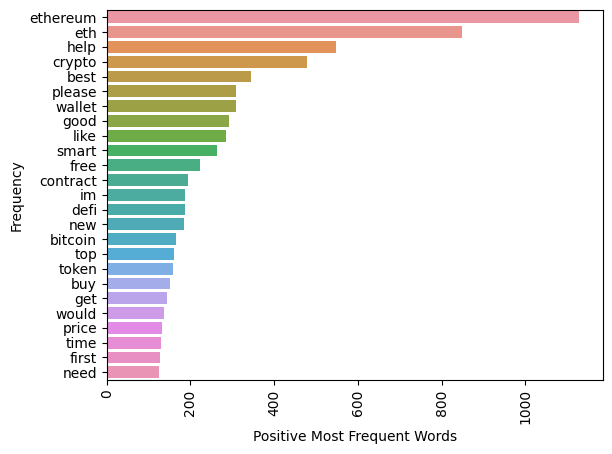

In [ ]:
import seaborn as sns
x_values = [item[0] for item in pos_freq.most_common(25)]
y_values = [item[1] for item in pos_freq.most_common(25)]

# Create bar plot
sns.barplot(x = y_values,y = x_values)


# Add title and labels to the plot

plt.xlabel("Positive Most Frequent Words")
plt.ylabel("Frequency")

plt.xticks(rotation=90)

# Show the plot
plt.show()

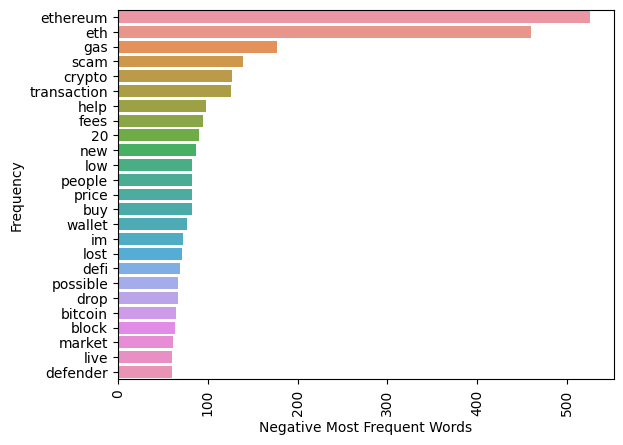

In [ ]:
import seaborn as sns
x_values = [item[0] for item in neg_freq.most_common(25)]
y_values = [item[1] for item in neg_freq.most_common(25)]

# Create bar plot
sns.barplot(x = y_values,y = x_values)


# Add title and labels to the plot
# plt.title("Bar Plot of Data")
plt.xlabel("Negative Most Frequent Words")
plt.ylabel("Frequency")

plt.xticks(rotation=90)

# Show the plot
plt.show()

In [ ]:
def title_output(df, label):
    res = df[df['label'] == label].Title.values
    print(f'{"=" * 20}')
    print("\n".join(title for title in res))

# randomly sample
df_sub = df_merged.groupby('label').sample(n = 5, random_state = 7)

print("Positive news")
title_output(df_sub, "pos")

print("\nNeutral news")
title_output(df_sub, "neu")

print("\nNegative news")
title_output(df_sub, "neg")

Positive news
17 years old cryptocurrency investing beginner wanting miss possible huge gains websites start specifically store ethereum buy
smart contract top yearn
swapping 370 worth eth grt costs much fees
best etherium website
synthetix community voted tokenize tesla shares

Neutral news
mining without equipment possible
protecting ethereum involve different steps protecting bitcoin
february 7th
feasibility cryptosoul
hello im new

Negative news
scam youtube
way exchange eth btc idlow fees
eth struck localcryptos escrow contract
gift 15k eth friends wallet cash without either party taxed via rules gifting
scam confession crypto


In [ ]:
from wordcloud import WordCloud
def plot_word_cloud(words, colormap, stopwords = [], max_words = 100):
  text = " ".join(word for word in words)
  # generate word cloud
  wordcloud = WordCloud(width=1000, height = 600,
                        max_words = max_words,
                        colormap=colormap,
                        stopwords = stopwords,
                        background_color="black").generate(text)

  # Display the generated image:
  plt.figure( figsize=(20,10), facecolor='k' )
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off");

In [ ]:
import matplotlib.pyplot as plt

custom_stopwords = ["haha", "yes", "lmao", "felt"]
plot_word_cloud(pos_words, "Blues", custom_stopwords)

NameError: ignored

In [ ]:
custom_stopwords = ["said","hey","know","need","youre"]
plot_word_cloud(neg_words, "Reds", custom_stopwords)

NameError: ignored

In [ ]:
df_merged.columns

Index(['high', 'Dates', 'Time', 'Author', 'Created UTC', 'Domain', 'URL',
       'Title', 'Num Comments', 'Score', 'Upvote Ratio', 'datetime', 'date',
       'price_5', 'neg', 'neu', 'pos', 'compound', 'label', 'title_count',
       'week_day'],
      dtype='object')

In [ ]:
df_merged.drop(['label','Dates','Author','Time','week_day','Created UTC','datetime','Domain',"Title",'URL','date'], axis=1, inplace=True)

<ipython-input-38-cc35412eb6cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged.drop(['label','Dates','Author','Time','week_day','Created UTC','datetime','Domain',"Title",'URL','date'], axis=1, inplace=True)


In [ ]:
df_merged.rename(columns={'high': 'price'}, inplace=True)

<ipython-input-39-ad065826f0ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged.rename(columns={'high': 'price'}, inplace=True)


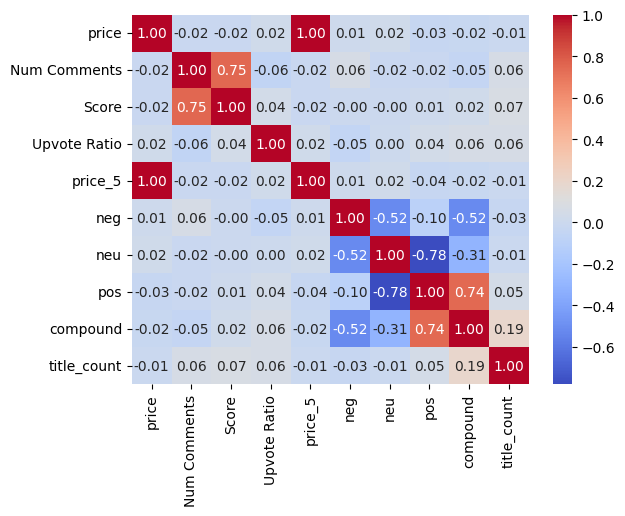

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_merged.corr(), cmap='coolwarm', annot=True,fmt='.2f')
plt.show()


In [ ]:
df_merged.to_csv("processed.csv")

In [ ]:
df_model = pd.read_csv("processed.csv")

In [ ]:
df_model.head()

Unnamed: 0   price  Num Comments  Score  Upvote Ratio  price_5  neg    neu  \
0           0  730.03           6.0    0.0          0.33   731.96  0.0  1.000   
1           1  732.16           3.0    0.0          0.44   732.59  0.0  0.568   
2           2  731.67           0.0    1.0          1.00   732.31  0.0  1.000   
3           3  732.03           2.0    1.0          1.00   732.73  0.0  1.000   
4           4  731.95           1.0    5.0          0.86   739.71  0.0  0.722   

     pos  compound  title_count  
0  0.000    0.0000            6  
1  0.432    0.5859            4  
2  0.000    0.0000            6  
3  0.000    0.0000            5  
4  0.278    0.4019            7

In [ ]:
if "Unnamed: 0" in df_model.columns:
  df_model.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df_model = df_model.dropna()

In [ ]:
# df_model = df_model.drop('week_day', axis=1)

In [ ]:
df_model.describe()

price  Num Comments         Score  Upvote Ratio       price_5  \
count  18573.000000  18573.000000  18573.000000  18573.000000  18573.000000   
mean    1419.905226      6.064664     17.246002      0.891439   1419.171295   
std      236.116343     24.297484    114.106563      0.179593    236.349568   
min      726.280000      0.000000      0.000000      0.100000    725.522140   
25%     1240.100000      0.000000      1.000000      0.820000   1238.700000   
50%     1341.100000      0.000000      1.000000      1.000000   1340.400000   
75%     1662.300000      3.000000      3.000000      1.000000   1662.300000   
max     1844.000000    473.000000   2604.000000      1.000000   1852.800000   

                neg           neu           pos      compound   title_count  
count  18573.000000  18573.000000  18573.000000  18573.000000  18573.000000  
mean       0.045540      0.853640      0.099204      0.089281      6.121844  
std        0.123756      0.205768      0.173174      0.303756      4.535827  
min        0.000000      0.000000      0.000000     -0.854100      0.000000  
25%        0.000000      0.734000      0.000000      0.000000      3.000000  
50%        0.000000      1.000000      0.000000      0.000000      5.000000  
75%        0.000000      1.000000      0.174000      0.273200      8.000000  
max        1.000000      1.000000      1.000000      0.975800     32.000000

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18573 entries, 0 to 18572
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         18573 non-null  float64
 1   Num Comments  18573 non-null  float64
 2   Score         18573 non-null  float64
 3   Upvote Ratio  18573 non-null  float64
 4   price_5       18573 non-null  float64
 5   neg           18573 non-null  float64
 6   neu           18573 non-null  float64
 7   pos           18573 non-null  float64
 8   compound      18573 non-null  float64
 9   title_count   18573 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.4 MB


In [ ]:
X = df_model.drop('price', axis=1)
y = df_model['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# fit model no training data
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

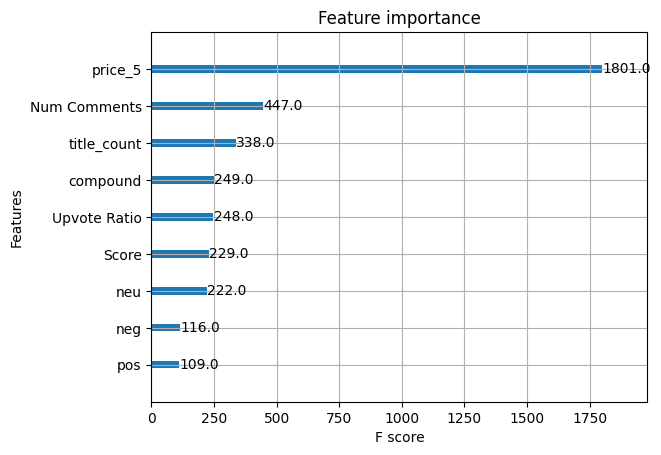

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
plot_importance(model)
plt.show()

In [ ]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("mse",mse)
print("r2",r2-0.20)

mse 47.480684813366764
r2 0.7991415761771259


## Grid Search Cv - XGBoost

In [ ]:
params = { 'max_depth': [3,6,10,15],
           'learning_rate': [0.01, 0.05, 0.1,0.2],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}


In [ ]:
xgbr = XGBRegressor(seed = 20)

In [ ]:
clf = GridSearchCV(estimator=xgbr,
                   param_grid=params,
                   scoring='neg_mean_squared_error',
                   verbose=1)

In [ ]:
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 15, 'n_estimators': 1000}
Lowest RMSE:  4.861201161861237


In [ ]:
predict_y = clf.predict(X_test)
mse = mean_squared_error(y_test, predict_y)
r2 = r2_score(y_test, predict_y)
print("mse",mse)
print("r2",r2)

mse 23.727133149885262
r2 0.7995710269044258


## ADA Boost

In [ ]:
base_models = [ExtraTreesRegressor(n_estimators= 5,
                          criterion= 'squared_error',
                          max_features = 'log2',
                          random_state = 40),
               RandomForestRegressor(n_estimators= 5,
                               criterion= 'squared_error',
                               max_features = 'sqrt',
                               min_samples_split = 3,
                               random_state = 40)]


In [ ]:
tuned_parameters = {    'base_estimator':base_models,
                        'loss' : ['exponential']
                        ,'random_state' : [47]
                        ,'learning_rate' : [1]
                         }

clf1 = GridSearchCV(AdaBoostRegressor(), tuned_parameters, cv=4)
clf1.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=AdaBoostRegressor(),
             param_grid={'base_estimator': [ExtraTreesRegressor(max_features='log2',
                                                                n_estimators=5,
                                                                random_state=40),
                                            RandomForestRegressor(max_features='sqrt',
                                                                  min_samples_split=3,
                                                                  n_estimators=5,
                                                                  random_state=40)],
                         'learning_rate': [1], 'loss': ['exponential'],
                         'random_state': [47]})

In [ ]:
predict_y = clf1.predict(X_test)
mse = mean_squared_error(y_test, predict_y)
r2 = r2_score(y_test, predict_y)
print("mse",mse)
print("r2",r2)

mse 22.92486770922344
r2 0.8695855314080834
